<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_YB/blob/main/%EC%95%88%EC%96%91%EC%B2%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EB%B0%8F_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터 불러오기 및 기타 작업

In [1]:
#그래프 글자 깨짐 방지 - 실행 후 런타임 다시시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120500 files and direc

In [1]:
#필요 패키지 로드
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', family='NanumBarunGothic')

In [3]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#전처리 파일 불러오기
#강우량
ahn21_r = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/공모전/2023 물/데이터/2021안양천강우량전처리.CSV")
ahn22_r = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/공모전/2023 물/데이터/2022안양천강우량전처리.CSV")

#수질
ahn21_q = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/공모전/2023 물/데이터/2021안양천수질전처리.CSV")
ahn22_q = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/공모전/2023 물/데이터/2022안양천수질전처리.CSV")

In [5]:
ahn21_r.head(3)

,Unnamed: 0,강우량계 코드,강우량계명,구청 코드,구청명,10분우량,자료수집 시각,year,month,day,hour,minute
0,0,2002,개봉2동,120,구로구,0.0,2021-01-01 00:02:00,2021,1,1,0,2
1,1,2001,구로구청,120,구로구,0.0,2021-01-04 14:09:00,2021,1,4,14,9
2,2,2001,구로구청,120,구로구,0.0,2021-01-04 14:19:00,2021,1,4,14,19


In [ ]:
ahn21_q.head(3)

,Unnamed: 0,날짜,시간,측정소명,수온,pH,용존산소(㎎/L),총질소(㎎/L),총인(㎎/L),총유기탄소,...,시안,Date,year,month,day,hour,minute,3days,누적 강우량(mm),현재 강우량(mm)
0,0,2021-12-02,00:00,안양천_자동,8.2,8.6,7.3,5.00,0.075,4.2,...,0,2021-12-02 00:00:00,2021,12,2,0,0,2021-11-29 00:00:00,26.5,0.0
1,1,2021-12-01,23:00,안양천_자동,8.3,8.6,7.3,4.58,0.075,4.2,...,0,2021-12-01 23:00:00,2021,12,1,23,0,2021-11-28 23:00:00,26.5,0.0
2,2,2021-12-01,22:00,안양천_자동,8.4,8.5,7.3,4.53,0.070,4.4,...,0,2021-12-01 22:00:00,2021,12,1,22,0,2021-11-28 22:00:00,26.5,0.0


In [6]:
#필요없는 칼럼 삭제
ahn21_r = ahn21_r.drop(['Unnamed: 0', '강우량계명', '구청 코드', '구청명'], axis=1)
ahn22_r = ahn22_r.drop(['Unnamed: 0', '강우량계명', '구청 코드', '구청명'], axis=1)

ahn21_q = ahn21_q.drop(['Unnamed: 0','페놀','시안'], axis=1)
ahn22_q = ahn22_q.drop(['Unnamed: 0','페놀','시안'], axis=1)

In [7]:
ahn21_r.head(3)

,강우량계 코드,10분우량,자료수집 시각,year,month,day,hour,minute
0,2002,0.0,2021-01-01 00:02:00,2021,1,1,0,2
1,2001,0.0,2021-01-04 14:09:00,2021,1,4,14,9
2,2001,0.0,2021-01-04 14:19:00,2021,1,4,14,19


In [8]:
ahn21_q.head(3)

,날짜,시간,측정소명,수온,pH,용존산소(㎎/L),총질소(㎎/L),총인(㎎/L),총유기탄소,Date,year,month,day,hour,minute,3days,누적 강우량(mm),현재 강우량(mm)
0,2021-12-02,00:00,안양천_자동,8.2,8.6,7.3,5.00,0.075,4.2,2021-12-02 00:00:00,2021,12,2,0,0,2021-11-29 00:00:00,26.5,0.0
1,2021-12-01,23:00,안양천_자동,8.3,8.6,7.3,4.58,0.075,4.2,2021-12-01 23:00:00,2021,12,1,23,0,2021-11-28 23:00:00,26.5,0.0
2,2021-12-01,22:00,안양천_자동,8.4,8.5,7.3,4.53,0.070,4.4,2021-12-01 22:00:00,2021,12,1,22,0,2021-11-28 22:00:00,26.5,0.0


###상관관계

In [9]:
AHN21 = ahn21_q.drop(['year', 'minute', '3days'],axis=1)
AHN22 = ahn22_q.drop(['year', 'minute', '3days'], axis=1)

In [ ]:
### 상관계수 시각화

def graph_cor(data):
  corr = data.corr()

  # 그림 사이즈 지정
  fig, ax = plt.subplots(figsize = (10,8))

  # 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
  mask = np.zeros_like(corr, dtype = np.bool)
  mask[np.triu_indices_from(mask)] = True

  # 하삼각행렬만 시각화(밑에만)
  sns.heatmap(corr,
              cmap = 'RdYlBu_r',
              annot = True,   # 실제 값을 표시
              mask = mask,      # 표시하지 않을 마스크 부분을 지정
              linewidths=.5,  # 경계면을 실선으로 구분하기
              cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
              vmin = -1,vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
              )

  plt.title('Correlation Heatmap')
  plt.show()

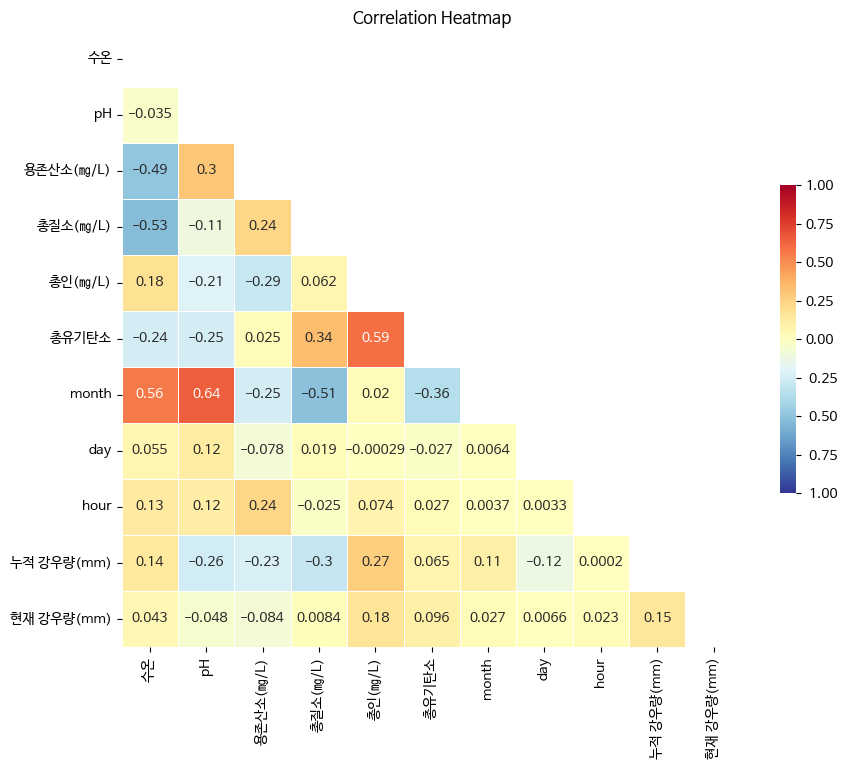

In [ ]:
graph_cor(AHN21)

1. 누적강우량과 수온, 총인, 총유기탄소는 양의 상관관계를, pH, 용존산소, 총질소는 음의 상관관계를 보임
2. 현재강우량도 비슷한 양상을 보이나, 총질소가 현재 강우량에서는 매우 약한 양의 상관관계를 보임
3. 수온과 총질소, 수온과 용존산소 : 음의 상관관계
4. 총인과 총유기탄소 : 양의 상관관계

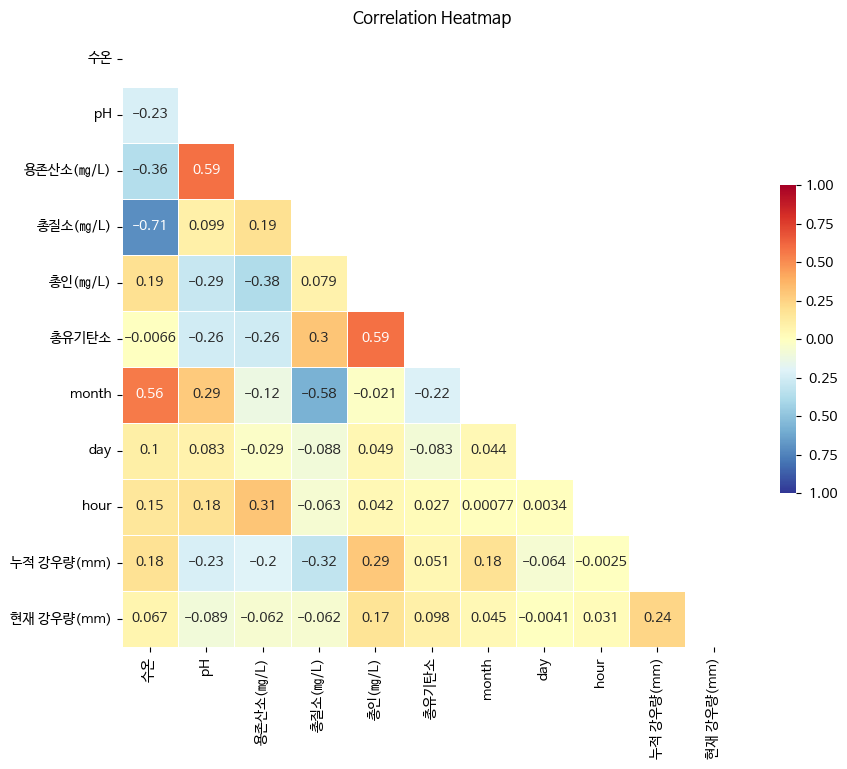

In [ ]:
graph_cor(AHN22)

1. 누적강우량과 수온, 총인, 총유기탄소는 양의 상관관계를, pH, 용존산소, 총질소는 음의 상관관계를 보임
2. 현재강우량도 비슷한 양상을 보임
3. 수온과 총질소 : 유의미한 음의 상관관계
4. 수온과 용존산소, 수온과 pH : 음의 상관관계
5. 총인과 총유기탄소 : 양의 상관관계

###시계열

> 월별

In [15]:
#line plot 그리기
def time_line_plot(data):
  plt.rcParams['figure.figsize'] = [8,12]
  plt.subplots(constrained_layout=True)

  clst=["tomato","gold","olivedrab","lightseagreen","steelblue","navy","indigo","palevioletred"]

  plt.subplot(4,2,1)
  plt.plot(data['Date'],data['수온'],color=clst[0])
  plt.ylabel("수온")

  plt.subplot(4,2,2)
  plt.plot(data['Date'],data['pH'],color=clst[1])
  plt.ylabel("pH")

  plt.subplot(4,2,3)
  plt.plot(data['Date'],data['용존산소(㎎/L)'],color=clst[2])
  plt.ylabel("용존산소(㎎/L)")

  plt.subplot(4,2,4)
  plt.plot(data['Date'],data['총질소(㎎/L)'],color=clst[3])
  plt.ylabel("총질소(㎎/L)")

  plt.subplot(4,2,5)
  plt.plot(data['Date'],data['총인(㎎/L)'],color=clst[4])
  plt.ylabel("총인(㎎/L)")

  plt.subplot(4,2,6)
  plt.plot(data['Date'],data['총유기탄소'],color=clst[5])
  plt.ylabel("총유기탄소")

  plt.subplot(4,2,7)
  plt.plot(data['Date'],data['누적 강우량(mm)'],color=clst[6])
  plt.ylabel("누적 강우량(mm)")
  plt.show()

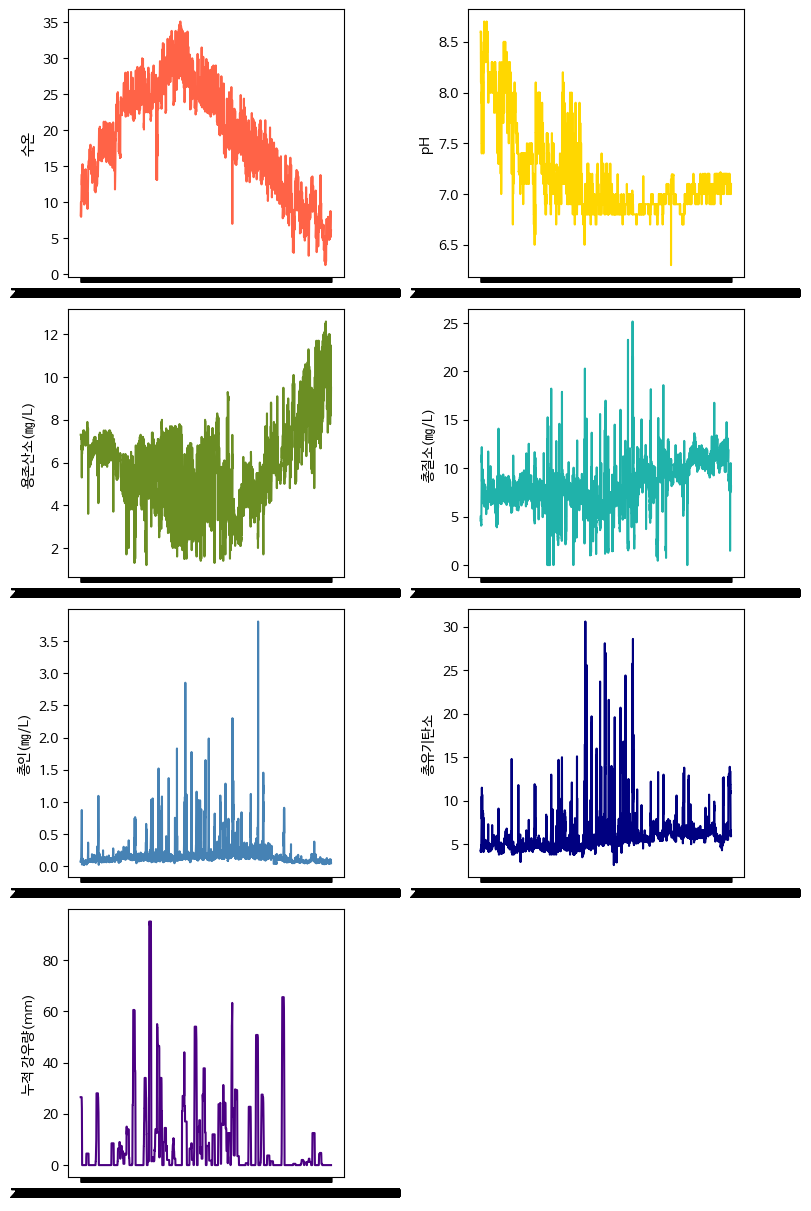

In [16]:
time_line_plot(AHN21)

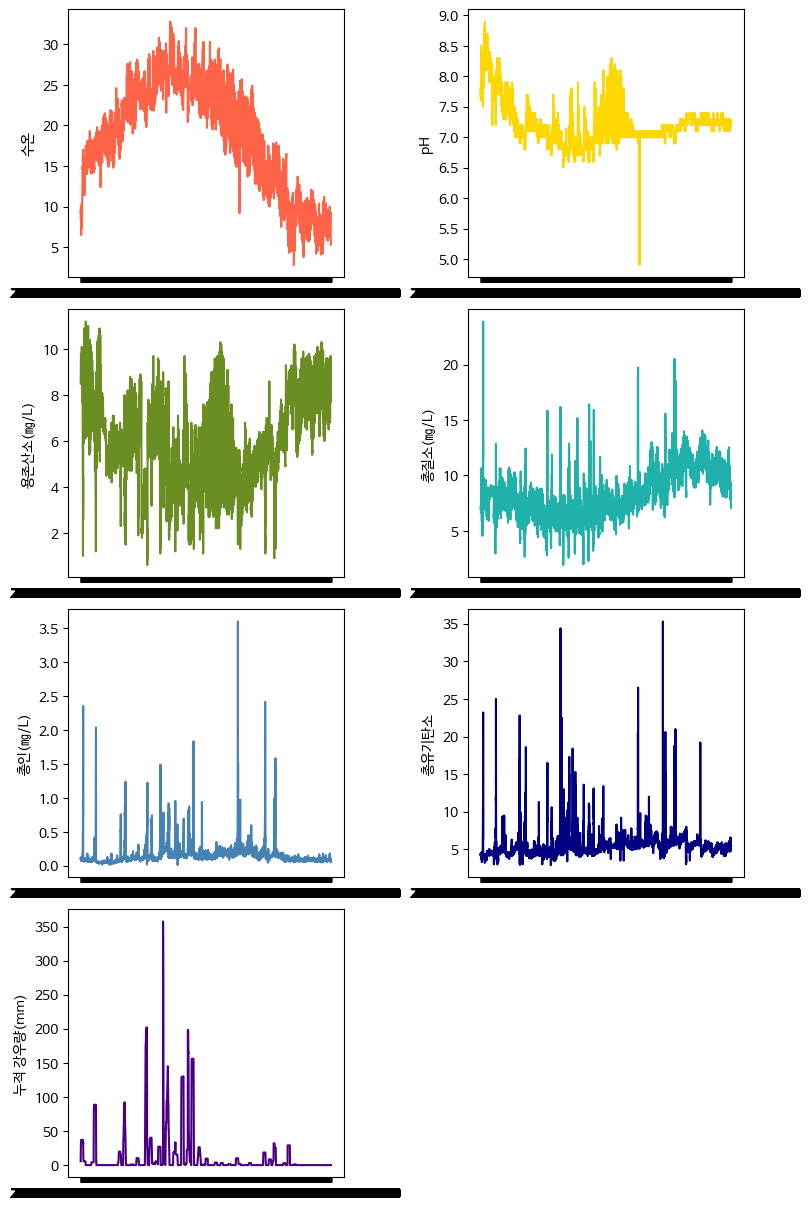

In [17]:
time_line_plot(AHN22)

In [18]:
#box plot 그리기
def time_box_plot(df):
  plt.rcParams['figure.figsize'] = [8,12]
  plt.subplots(constrained_layout=True)

  plt.subplot(4,2,1)
  sns.boxplot(x='month', y='수온', data =df, palette="plasma")
  plt.ylabel("수온")

  plt.subplot(4,2,2)
  sns.boxplot(x='month', y='pH', data =df, palette="plasma")
  plt.ylabel("pH")

  plt.subplot(4,2,3)
  sns.boxplot(x='month', y='용존산소(㎎/L)', data =df, palette="plasma")
  plt.ylabel("용존산소(㎎/L)")

  plt.subplot(4,2,4)
  sns.boxplot(x='month', y='총질소(㎎/L)', data =df, palette="plasma")
  plt.ylabel("총질소(㎎/L)")

  plt.subplot(4,2,5)
  sns.boxplot(x='month', y='총인(㎎/L)', data =df, palette="plasma")
  plt.ylim([0,0.7])
  plt.ylabel("총인(㎎/L)")

  plt.subplot(4,2,6)
  sns.boxplot(x='month', y='총유기탄소', data =df, palette="plasma")
  plt.ylim([0,10])
  plt.ylabel("총유기탄소")

  plt.subplot(4,2,7)
  sns.boxplot(x='month', y='누적 강우량(mm)', data =df, palette="plasma")
  plt.ylim([0, 40])
  plt.show()

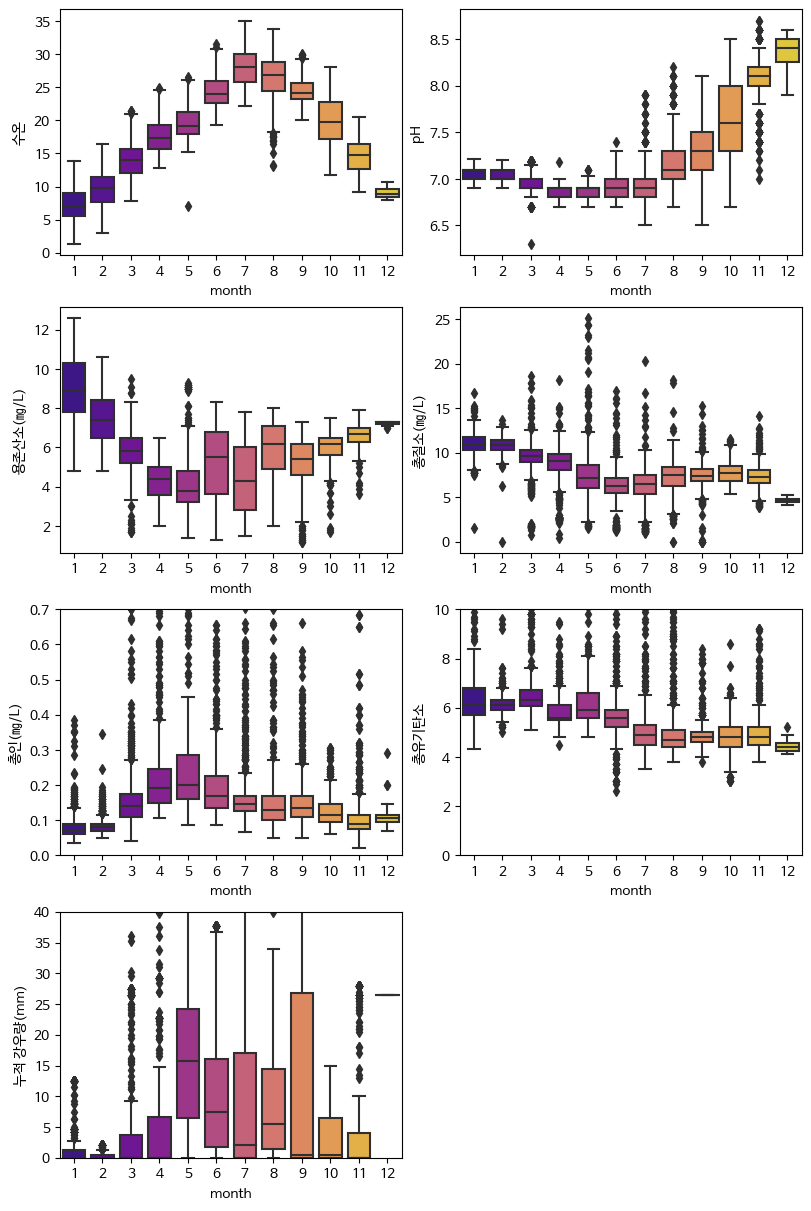

In [19]:
time_box_plot(AHN21)

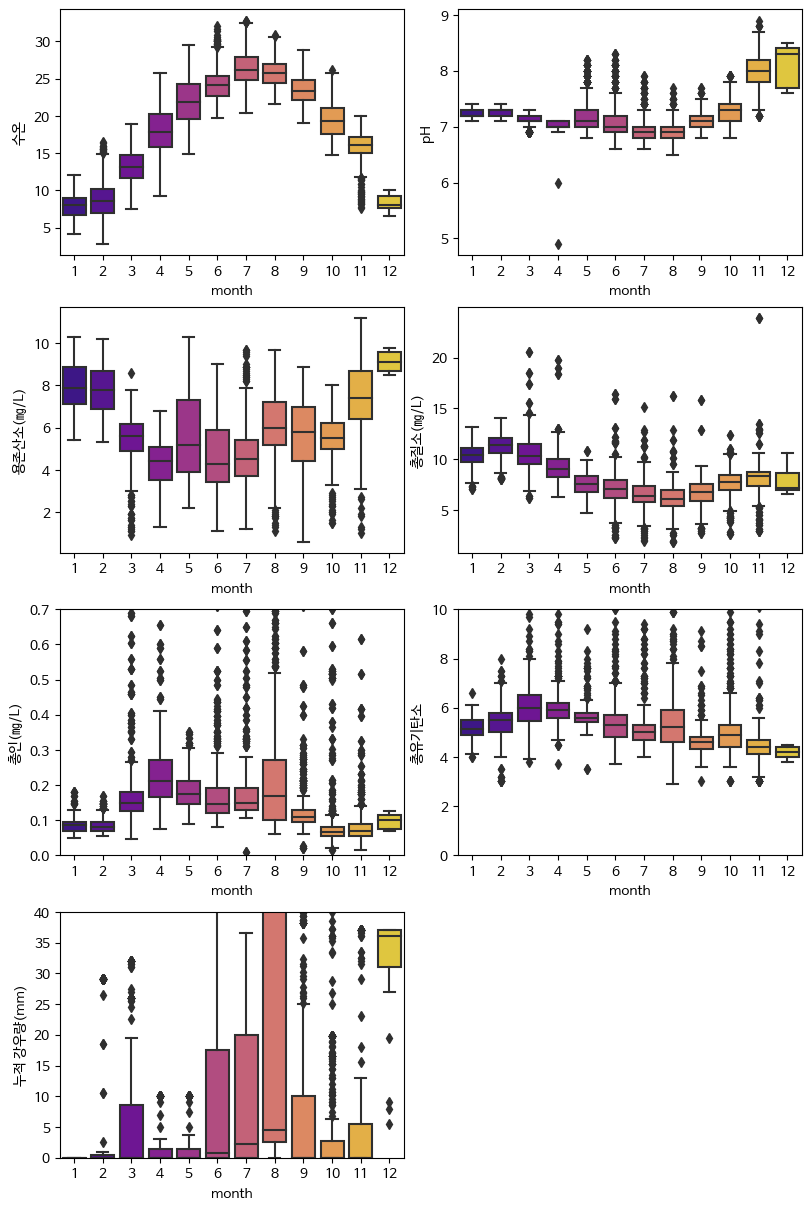

In [20]:
time_box_plot(AHN22)

In [21]:
varlst=['month','수온', 'pH', '용존산소(㎎/L)', '총질소(㎎/L)', '총인(㎎/L)','총유기탄소']
AHN21[varlst].groupby(['month']).quantile(q=0.5)

,수온,pH,용존산소(㎎/L),총질소(㎎/L),총인(㎎/L),총유기탄소
month,,,,,,
1,7.1,7.1,8.9,11.020000,0.070,6.1
2,9.8,7.0,7.4,10.840000,0.080,6.1
3,14.0,6.9,5.8,9.670000,0.140,6.3
4,17.3,6.9,4.4,9.085000,0.190,5.6
5,19.2,6.9,3.8,7.125000,0.200,5.9
6,24.0,6.9,5.5,6.300000,0.170,5.6
7,28.1,6.9,4.3,6.505000,0.145,4.9
8,26.8,7.1,6.2,7.510000,0.130,4.7
9,24.1,7.3,5.4,7.370894,0.135,4.8


In [22]:
varlst=['month','수온', 'pH', '용존산소(㎎/L)', '총질소(㎎/L)', '총인(㎎/L)','총유기탄소']
AHN22[varlst].groupby(['month']).quantile(q=0.5)

,수온,pH,용존산소(㎎/L),총질소(㎎/L),총인(㎎/L),총유기탄소
month,,,,,,
1,8.00,7.2,7.9,10.440000,0.085000,5.15
2,8.60,7.3,7.8,11.380000,0.080000,5.50
3,13.20,7.1,5.6,10.360000,0.149163,6.00
4,17.80,7.0,4.4,9.002840,0.210000,5.90
5,21.80,7.1,5.2,7.595000,0.175000,5.60
6,24.10,7.0,4.3,7.090000,0.146430,5.30
7,26.10,6.9,4.5,6.400000,0.150000,5.00
8,25.70,6.9,6.0,6.140000,0.170000,5.20
9,23.35,7.1,5.8,6.780000,0.110000,4.60


> 일별

In [30]:
# 지정한 월의 일에 따른 trend 확인
def print_plot_byday(data,var,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12):
  plt.rcParams['figure.figsize'] = [10,8]
  plt.subplots(constrained_layout=True)
  plt.suptitle(data.loc[0,"측정소명"])

  plt.subplot(3,4,1)
  sns.barplot(x=data.loc[data["month"]==m1,'day'], y=data.loc[data["month"]==m1,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m1)+"월")

  plt.subplot(3,4,2)
  sns.barplot(x=data.loc[data["month"]==m2,'day'], y=data.loc[data["month"]==m2,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m2)+"월")

  plt.subplot(3,4,3)
  sns.barplot(x=data.loc[data["month"]==m3,'day'], y=data.loc[data["month"]==m3,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m3)+"월")

  plt.subplot(3,4,4)
  sns.barplot(x=data.loc[data["month"]==m4,'day'], y=data.loc[data["month"]==m4,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m4)+"월")

  plt.subplot(3,4,5)
  sns.barplot(x=data.loc[data["month"]==m5,'day'], y=data.loc[data["month"]==m5,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m5)+"월")

  plt.subplot(3,4,6)
  sns.barplot(x=data.loc[data["month"]==m6,'day'], y=data.loc[data["month"]==m6,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m6)+"월")

  plt.subplot(3,4,7)
  sns.barplot(x=data.loc[data["month"]==m7,'day'], y=data.loc[data["month"]==m7,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m7)+"월")

  plt.subplot(3,4,8)
  sns.barplot(x=data.loc[data["month"]==m8,'day'], y=data.loc[data["month"]==m8,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m8)+"월")

  plt.subplot(3,4,9)
  sns.barplot(x=data.loc[data["month"]==m9,'day'], y=data.loc[data["month"]==m9,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m9)+"월")

  plt.subplot(3,4,10)
  sns.barplot(x=data.loc[data["month"]==m10,'day'], y=data.loc[data["month"]==m10,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m10)+"월")

  plt.subplot(3,4,11)
  sns.barplot(x=data.loc[data["month"]==m11,'day'], y=data.loc[data["month"]==m11,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m11)+"월")

  plt.subplot(3,4,12)
  sns.barplot(x=data.loc[data["month"]==m12,'day'], y=data.loc[data["month"]==m12,'현재 강우량(mm)'], palette="cividis")
  plt.gca().title.set_text(str(m12)+"월")

  plt.show()

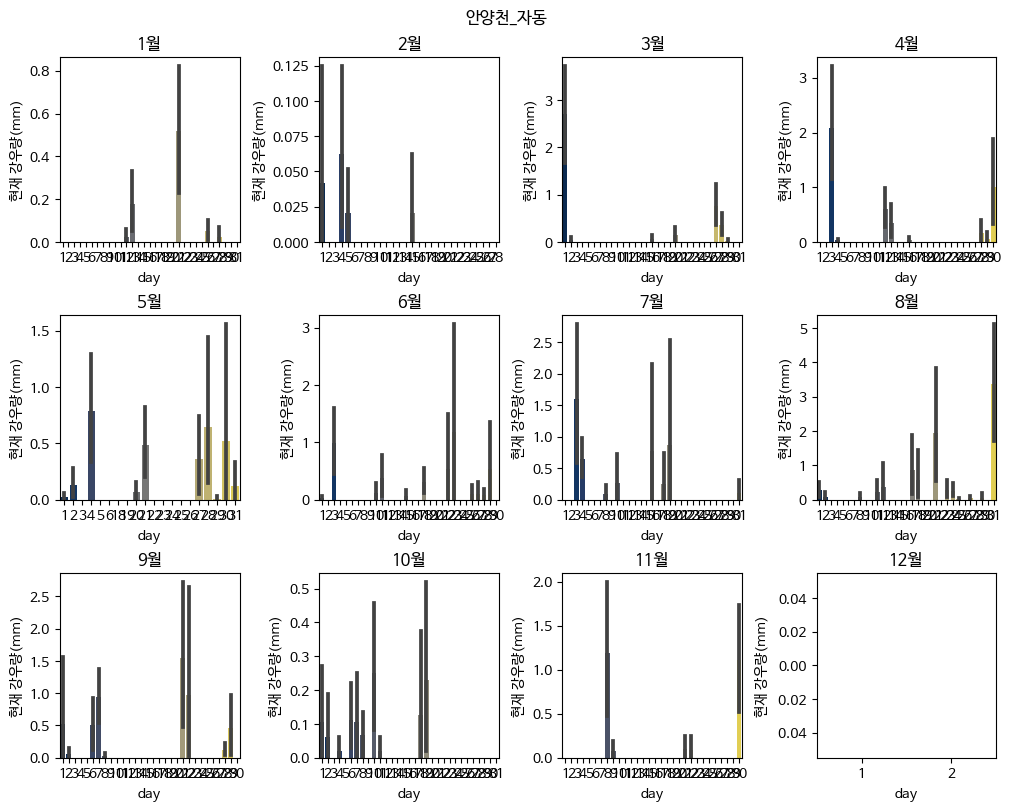

In [31]:
print_plot_byday(AHN21,"pH",1,2,3,4,5,6,7,8,9,10,11,12)

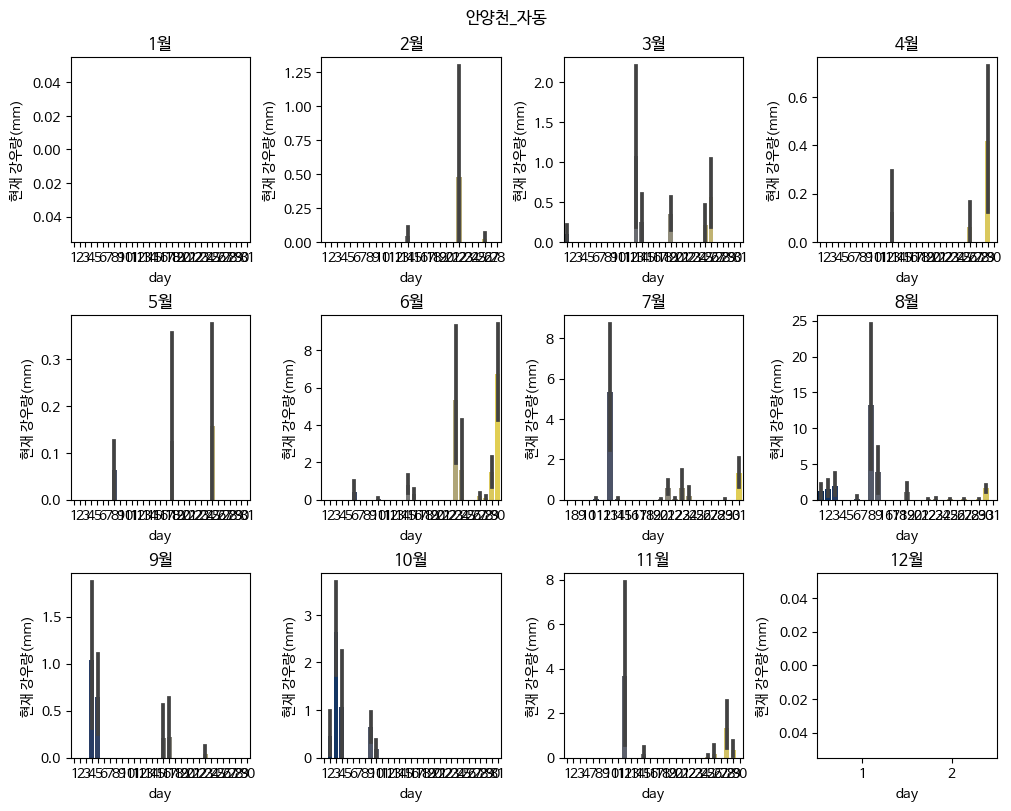

In [32]:
print_plot_byday(AHN22,"pH",1,2,3,4,5,6,7,8,9,10,11,12)

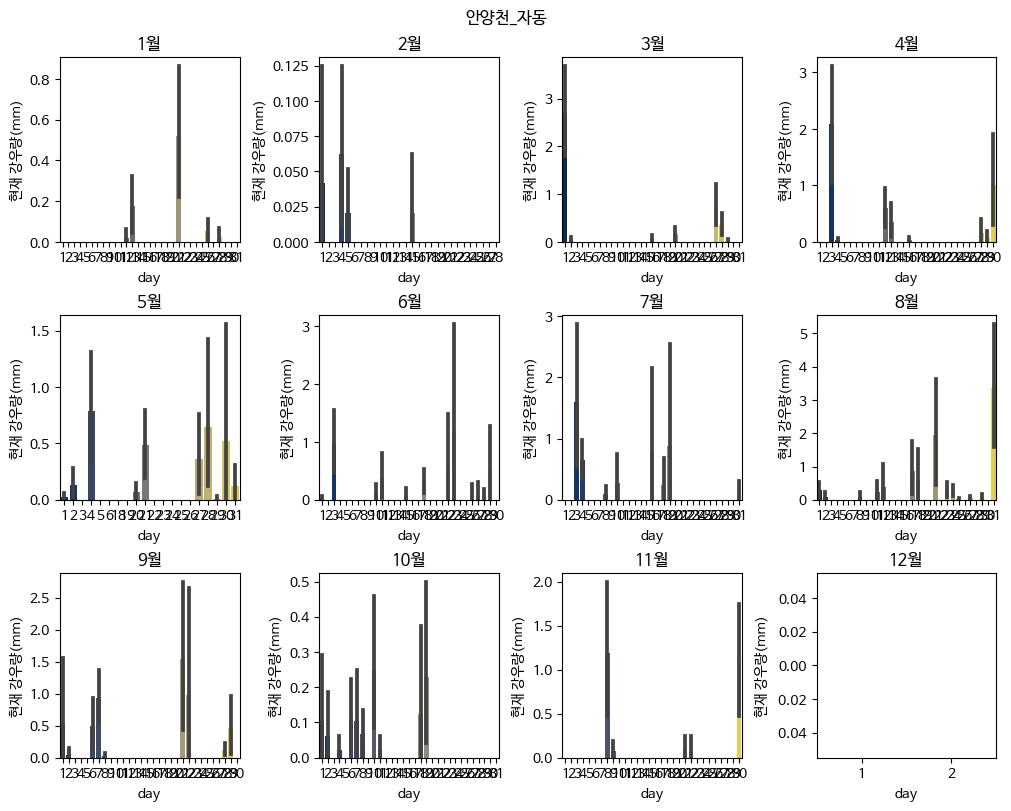

In [35]:
print_plot_byday(AHN21,"용존산소(㎎/L)",1,2,3,4,5,6,7,8,9,10,11,12)

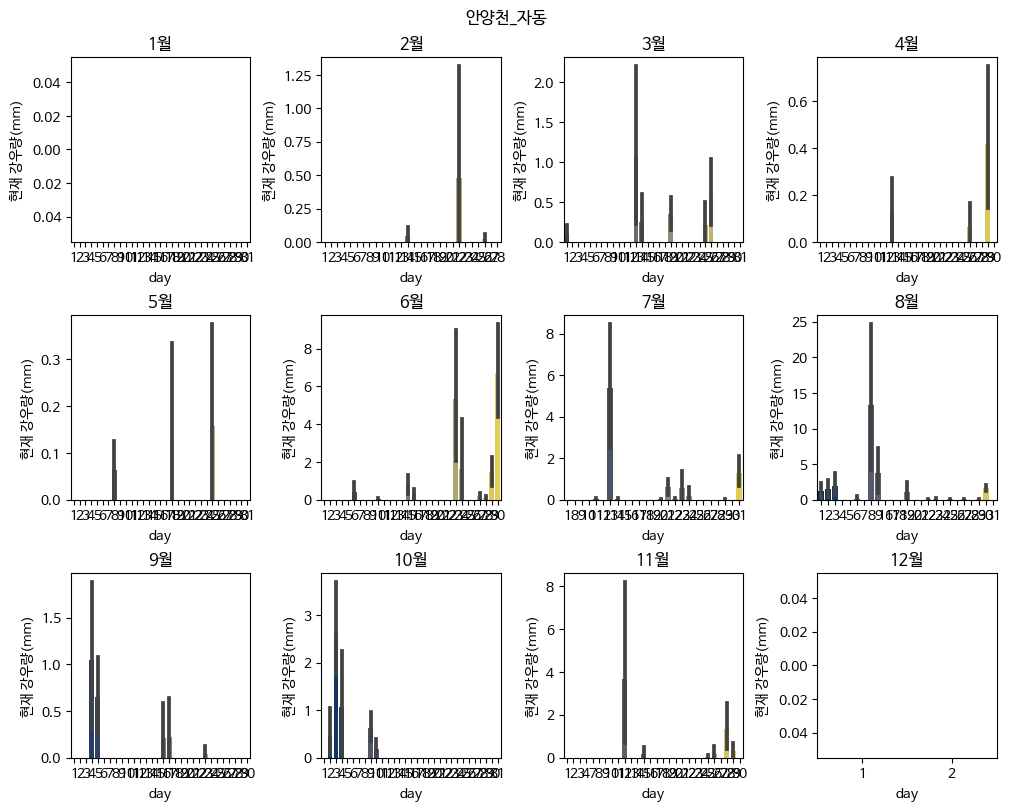

In [40]:
print_plot_byday(AHN22,"용존산소(㎎/L)",1,2,3,4,5,6,7,8,9,10,11,12)

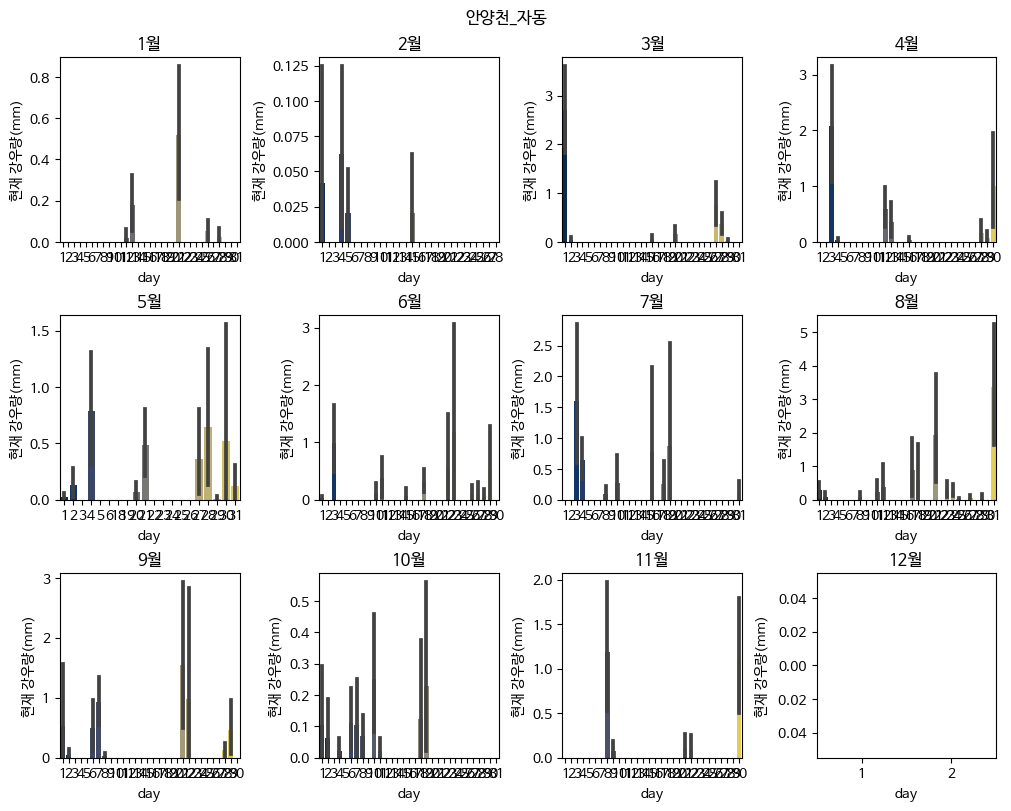

In [41]:
print_plot_byday(AHN21,"총질소(㎎/L)",1,2,3,4,5,6,7,8,9,10,11,12)

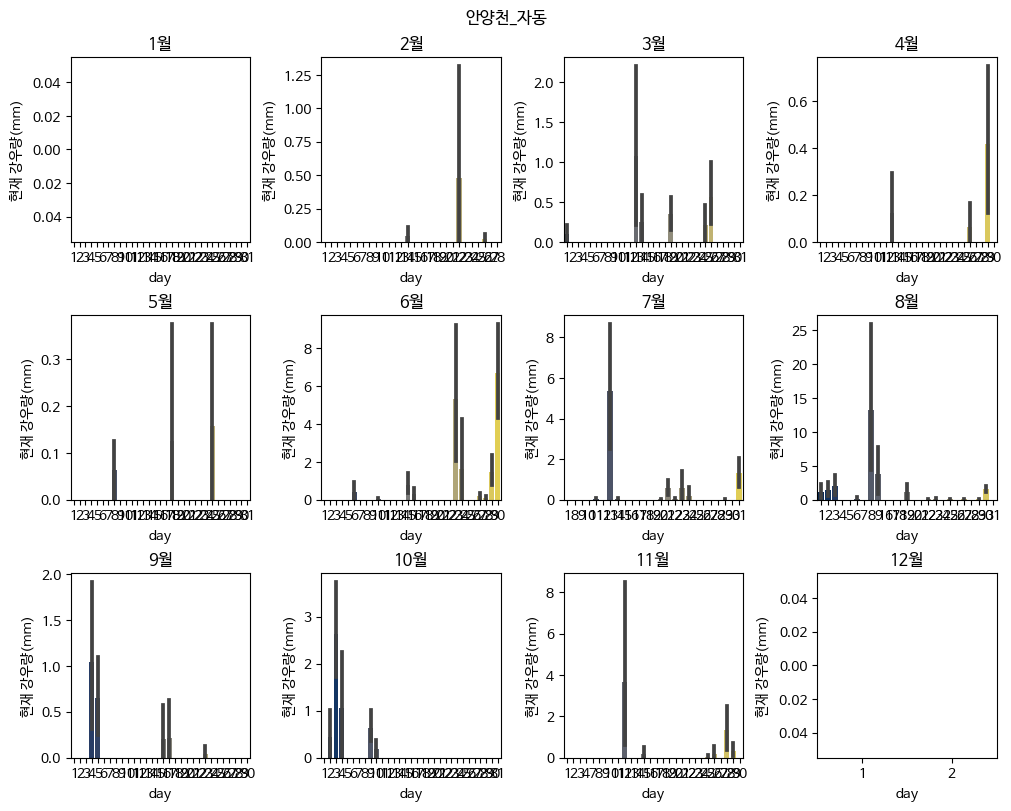

In [42]:
print_plot_byday(AHN22,"총질소(㎎/L)",1,2,3,4,5,6,7,8,9,10,11,12)

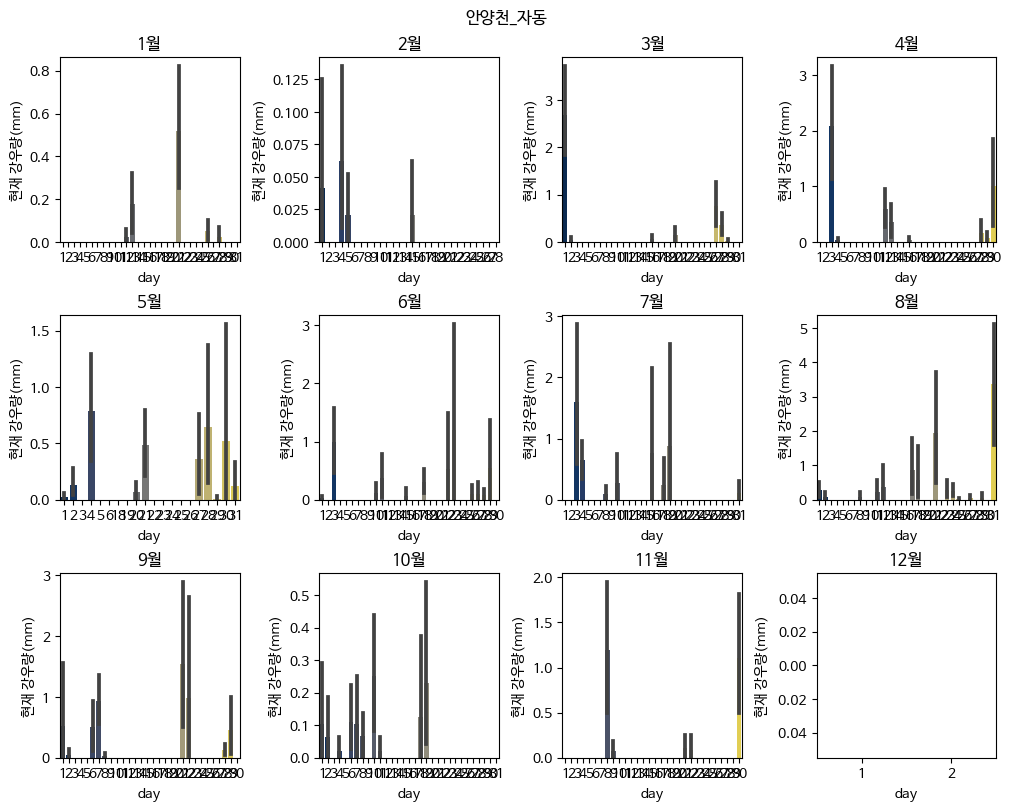

In [43]:
print_plot_byday(AHN21,"총인(㎎/L)",1,2,3,4,5,6,7,8,9,10,11,12)

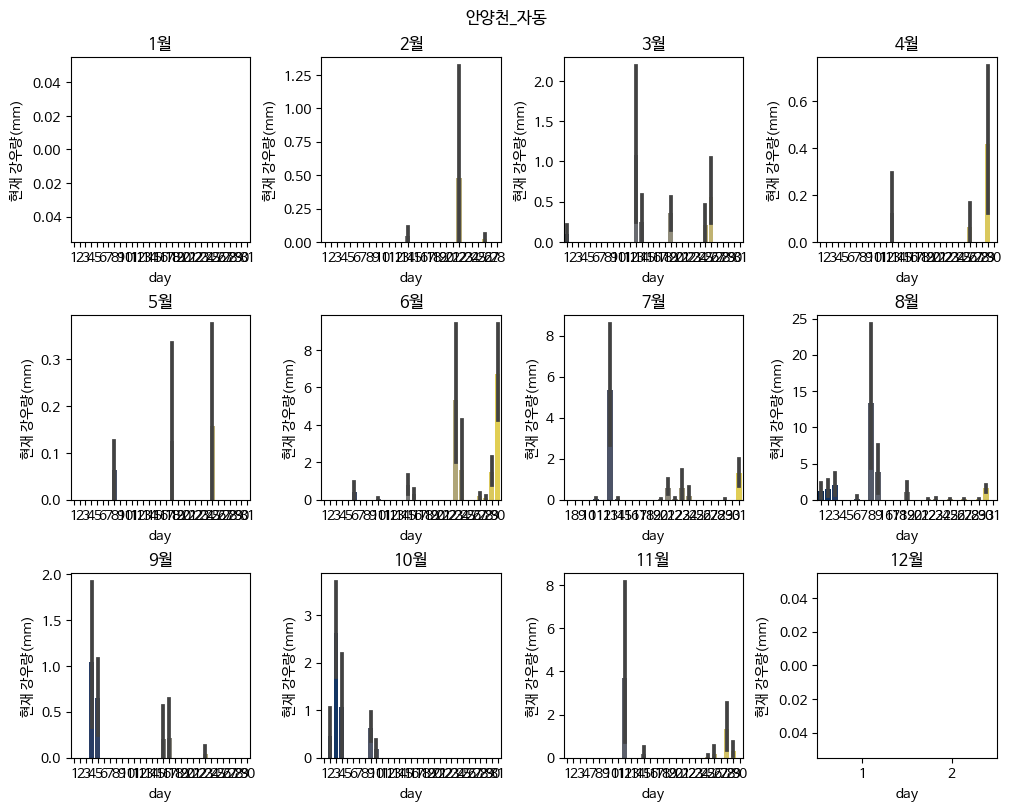

In [44]:
print_plot_byday(AHN22,"총인(㎎/L)",1,2,3,4,5,6,7,8,9,10,11,12)

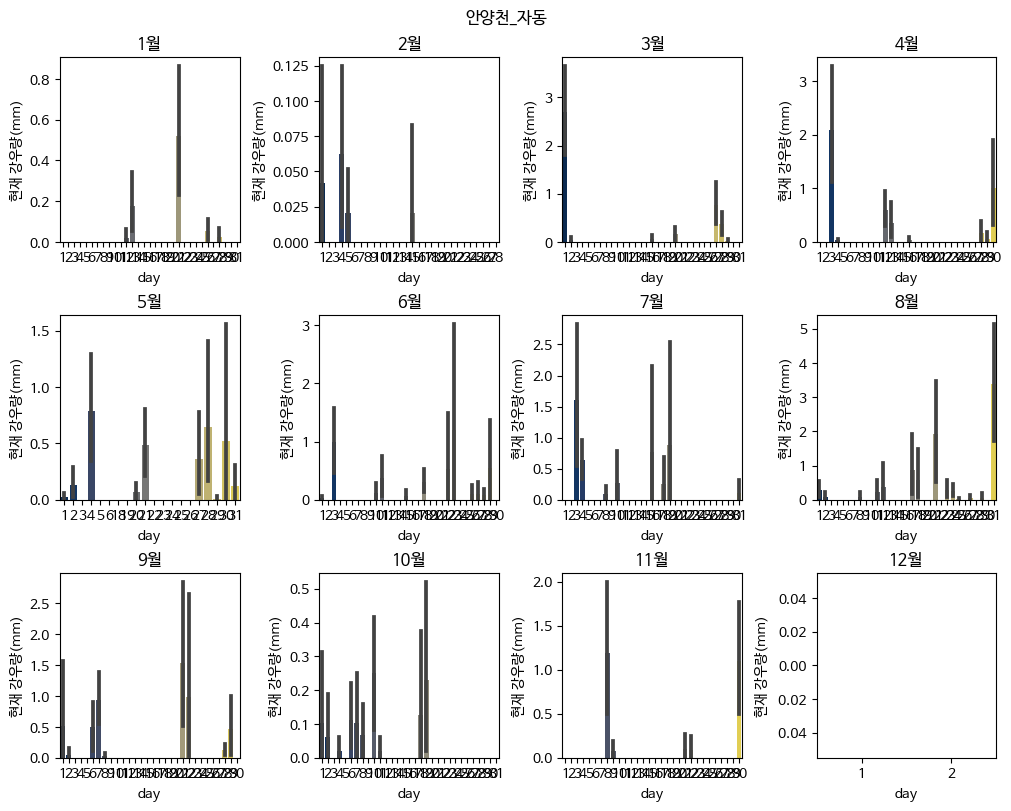

In [45]:
print_plot_byday(AHN21,"총유기탄소",1,2,3,4,5,6,7,8,9,10,11,12)

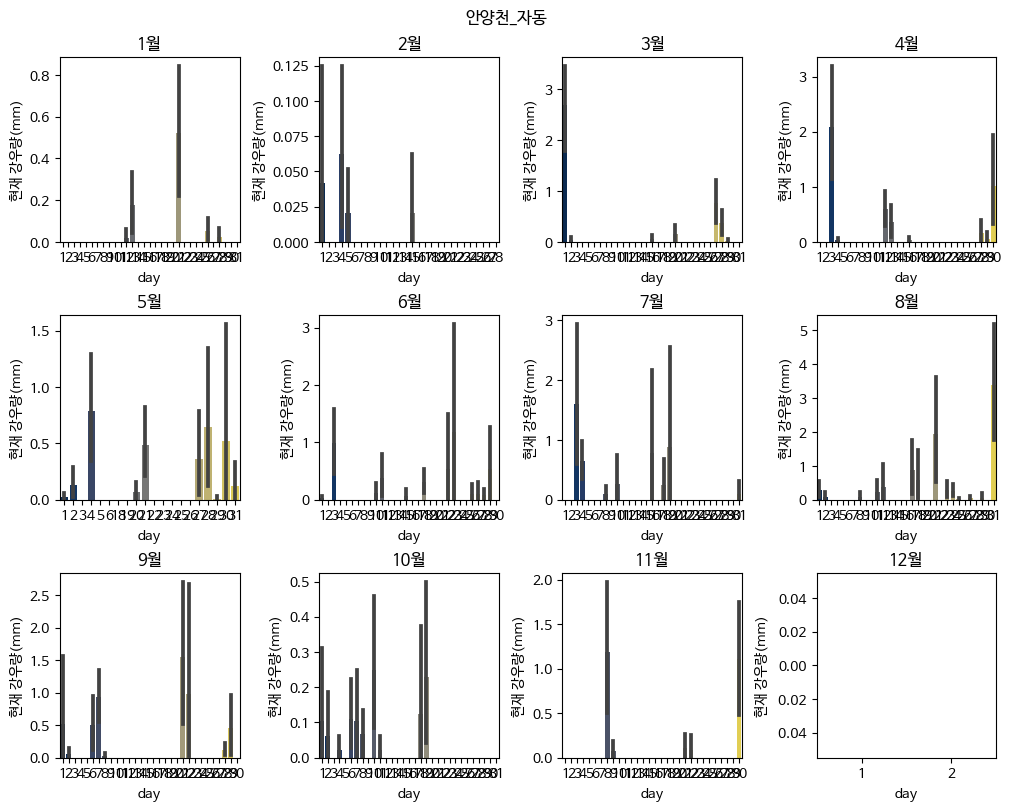

In [46]:
print_plot_byday(AHN21,"총유기탄소",1,2,3,4,5,6,7,8,9,10,11,12)

> 시간대별

In [52]:
# 지정한 월과 일의 시간에 따른 trend 확인
def print_plot_byhour(data,var,CM,CD,NM,ND):
  plt.rcParams['figure.figsize'] = [10,8]
  plt.subplots(constrained_layout=True)
  plt.suptitle(data.loc[0,"측정소명"])

  cond1 = ((data["month"]==CM)&(data["day"]==CD))
  cond2 = ((data["month"]==NM)&(data["day"]==ND))

  plt.subplot(2,2,1)
  sns.barplot(x=data.loc[cond1,'hour'], y=data.loc[cond1,'현재 강우량(mm)'], palette="twilight")
  plt.gca().title.set_text(str(CM)+"월"+str(CD)+"일")

  plt.subplot(2,2,3)
  sns.barplot(x='hour', y=var, data =data.loc[cond1], palette="twilight")

  plt.subplot(2,2,2)
  sns.barplot(x=data.loc[cond2,'hour'], y=data.loc[cond2,'현재 강우량(mm)'], palette="twilight")
  plt.gca().title.set_text(str(NM)+"월"+str(ND)+"일")

  plt.subplot(2,2,4)
  sns.barplot(x='hour', y=var, data =data.loc[cond2], palette="twilight")
  plt.show()

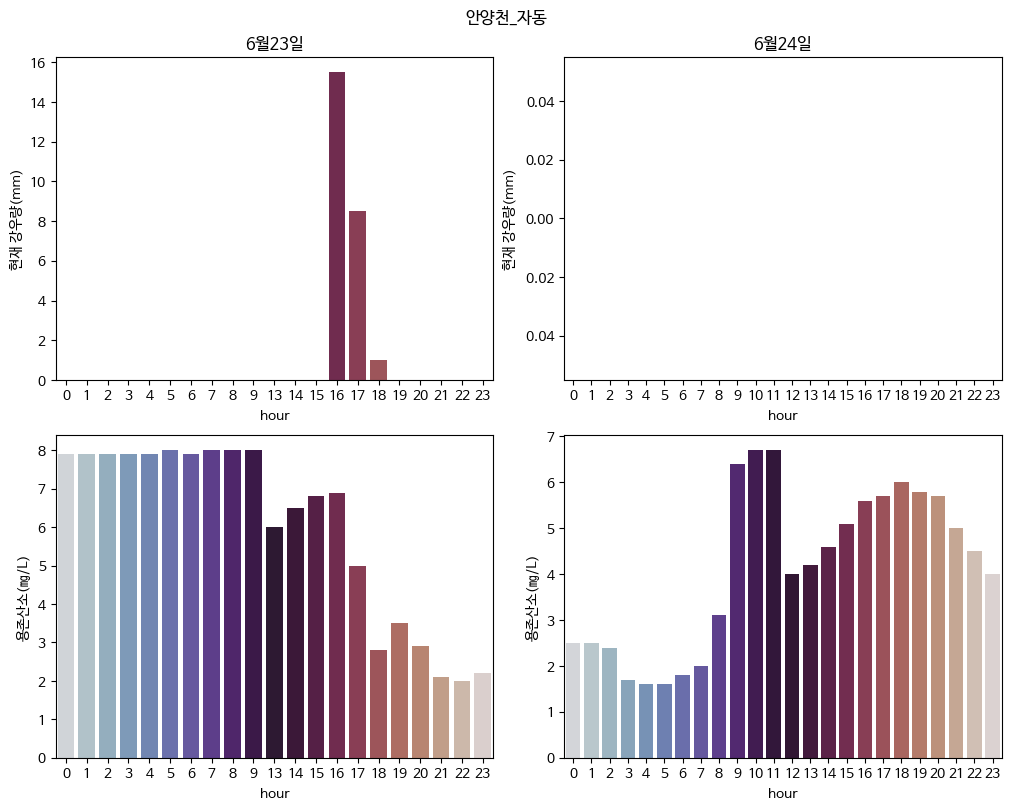

In [53]:
print_plot_byhour(AHN21,"용존산소(㎎/L)",6,23,6,24)

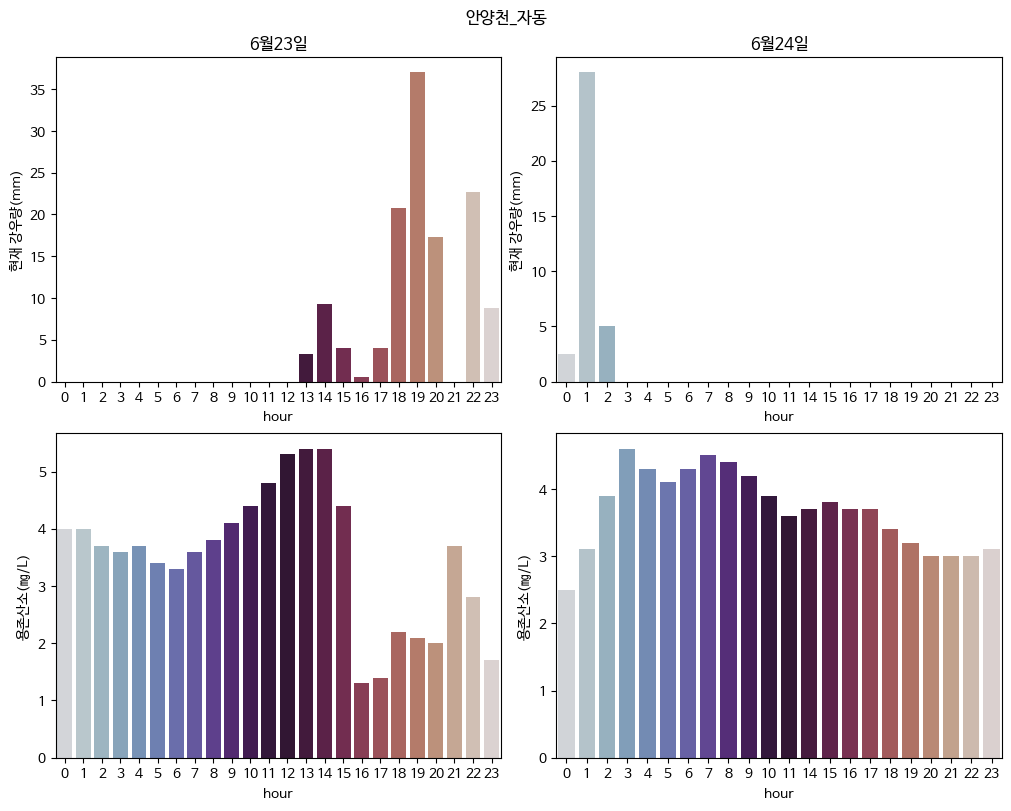

In [60]:
print_plot_byhour(AHN22,"용존산소(㎎/L)",6,23,6,24)

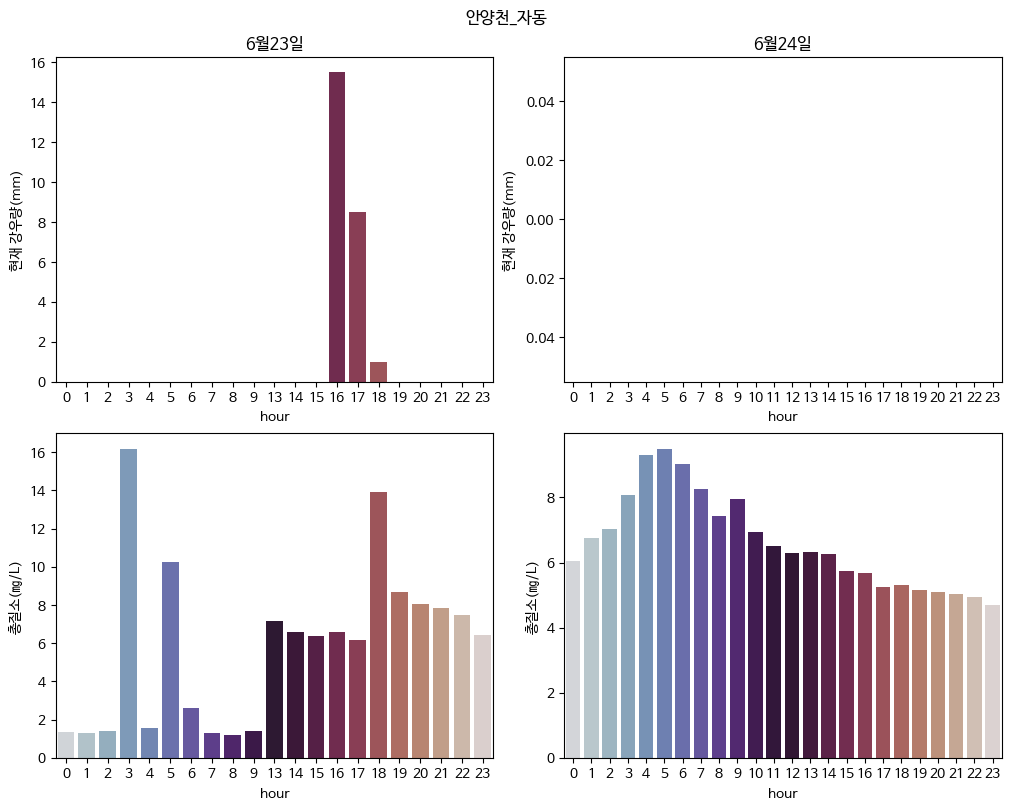

In [61]:
print_plot_byhour(AHN21,"총질소(㎎/L)",6,23,6,24)

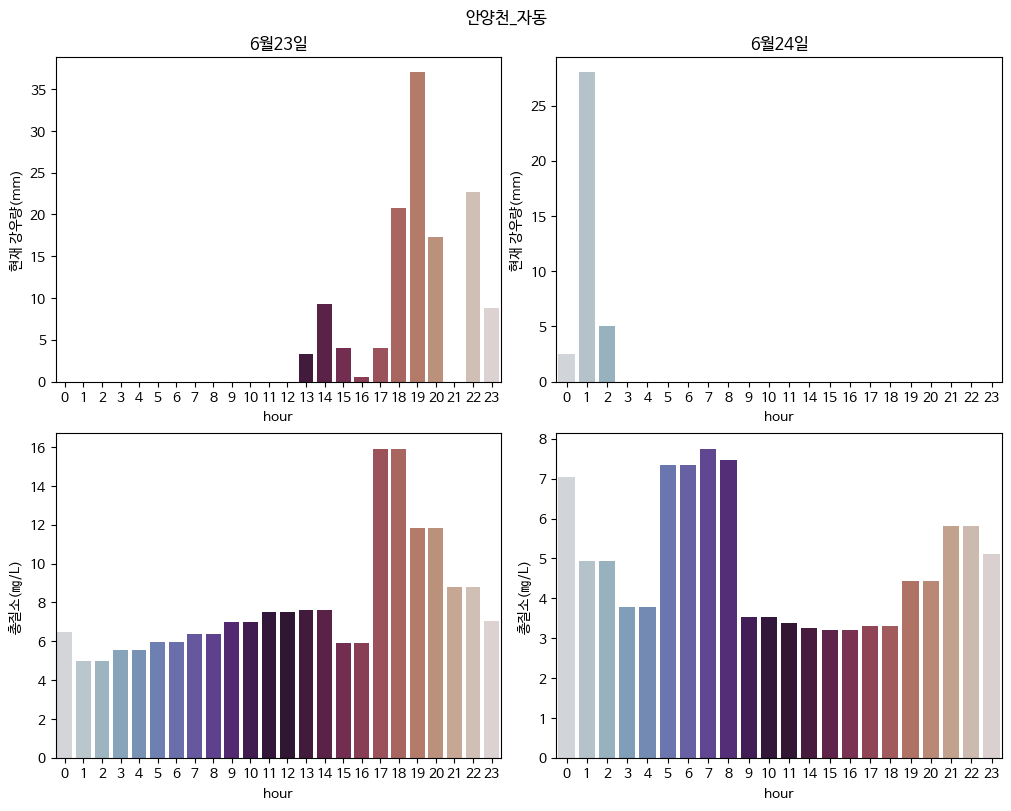

In [62]:
print_plot_byhour(AHN22,"총질소(㎎/L)",6,23,6,24)

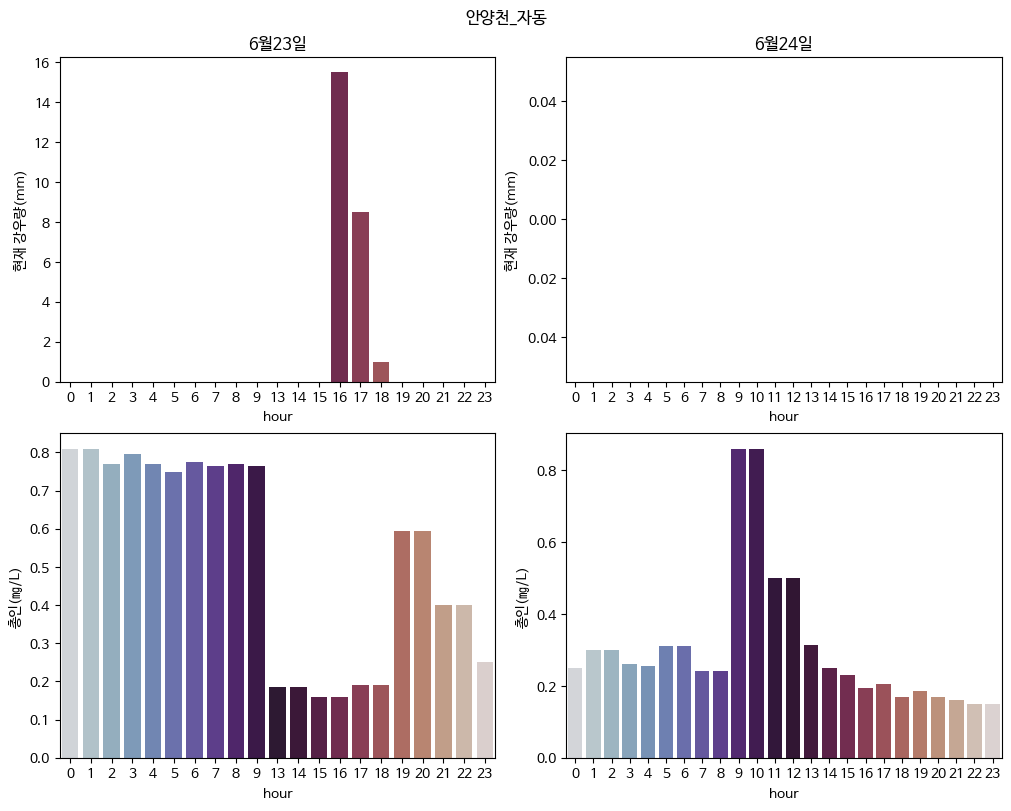

In [63]:
print_plot_byhour(AHN21,"총인(㎎/L)",6,23,6,24)

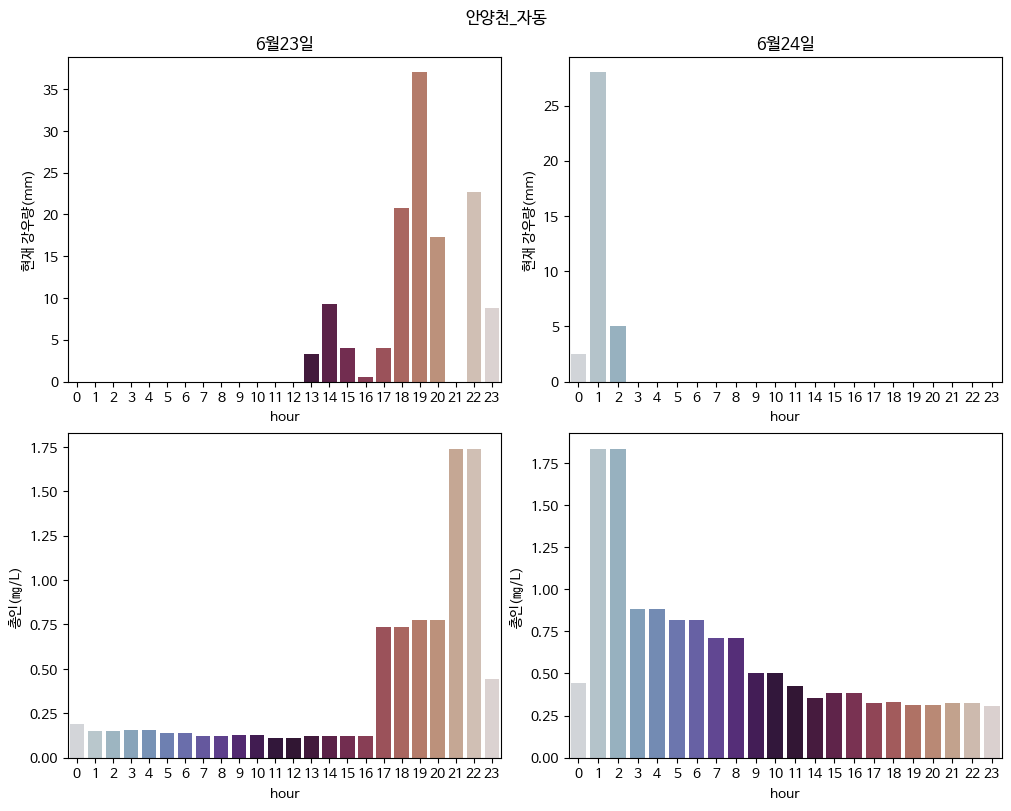

In [64]:
print_plot_byhour(AHN22,"총인(㎎/L)",6,23,6,24)

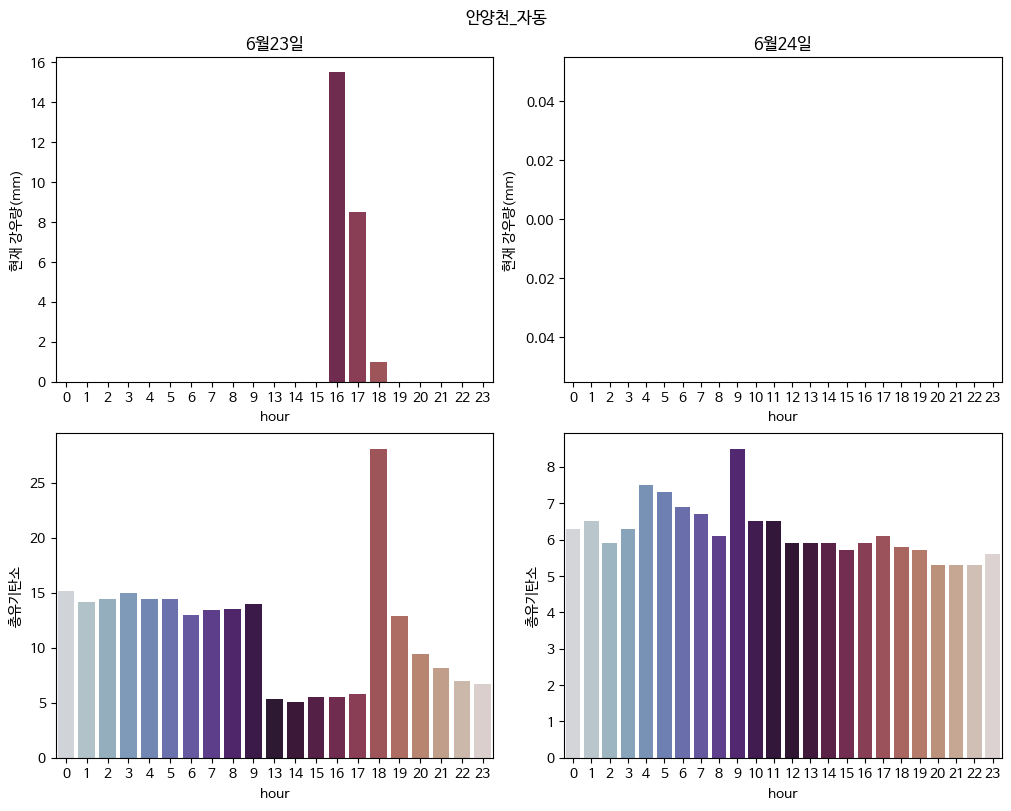

In [65]:
print_plot_byhour(AHN21,"총유기탄소",6,23,6,24)

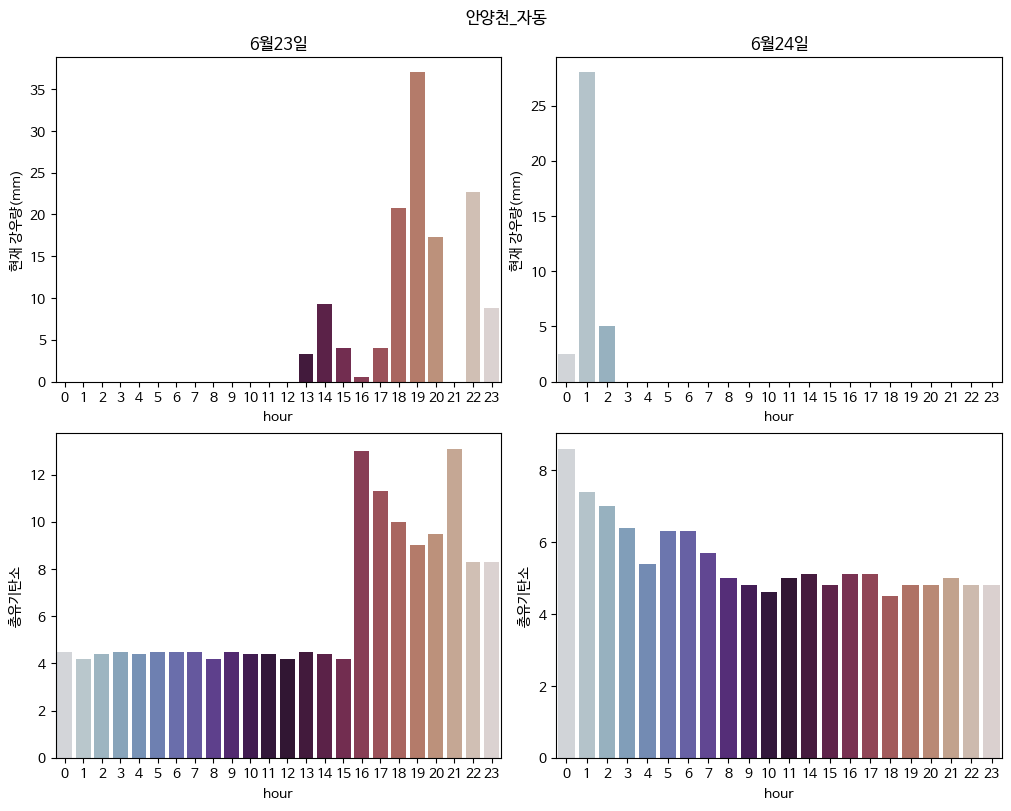

In [66]:
print_plot_byhour(AHN22,"총유기탄소",6,23,6,24)